__importing Libraries__

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_absolute_percentage_error

__Data Understanding__

In [4]:
hcp = pd.read_csv("C:/Users/Sathiaseelan/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt",
                  sep = ';', low_memory=False)

In [5]:
hcp.shape

(2075259, 9)

In [6]:
hcp.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
hcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


__EDA Process / Data Preprocessing__

In [9]:
hcp['Datetime'] = pd.to_datetime(hcp['Date'] + ' ' + hcp['Time'], format='%d/%m/%Y %H:%M:%S')

In [10]:
hcp.drop(['Time','Date'], axis=1, inplace=True)
hcp.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [11]:
hcp['Global_active_power'] = pd.to_numeric(hcp['Global_active_power'], errors='coerce')
hcp['Global_reactive_power'] = pd.to_numeric(hcp['Global_reactive_power'], errors='coerce')
hcp['Voltage'] = pd.to_numeric(hcp['Voltage'], errors='coerce')
hcp['Sub_metering_1'] = pd.to_numeric(hcp['Sub_metering_1'], errors='coerce')
hcp['Sub_metering_2'] = pd.to_numeric(hcp['Sub_metering_2'], errors='coerce')
hcp['Global_intensity'] = pd.to_numeric(hcp['Global_intensity'], errors='coerce')

In [12]:
hcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


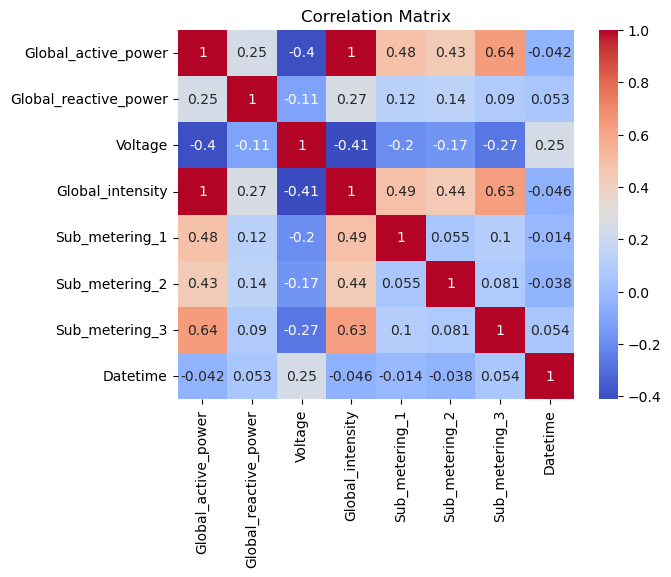

In [13]:
# Correlation Matrix
correlation_matrix = hcp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
hcp.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [15]:
hcp['Global_active_power'] = hcp['Global_active_power'].fillna(hcp['Global_active_power'].median())

In [16]:
hcp['Global_reactive_power'] = hcp['Global_reactive_power'].fillna(hcp['Global_reactive_power'].median())
hcp['Voltage'] = hcp['Voltage'].fillna(hcp['Voltage'].median())
hcp['Global_intensity'] = hcp['Global_intensity'].fillna(hcp['Global_intensity'].median())
hcp['Sub_metering_1'] = hcp['Sub_metering_1'].fillna(hcp['Sub_metering_1'].median())
hcp['Sub_metering_2'] = hcp['Sub_metering_2'].fillna(hcp['Sub_metering_2'].median())
hcp['Sub_metering_3'] = hcp['Sub_metering_3'].fillna(hcp['Sub_metering_3'].median())

In [17]:
hcp.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [18]:
hcp.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259
mean,1.085486e+00,1.234176e-01,2.408420e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,2008-12-06 07:12:59.999994112
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.052065e+00,1.120452e-01,3.219699e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,NaN


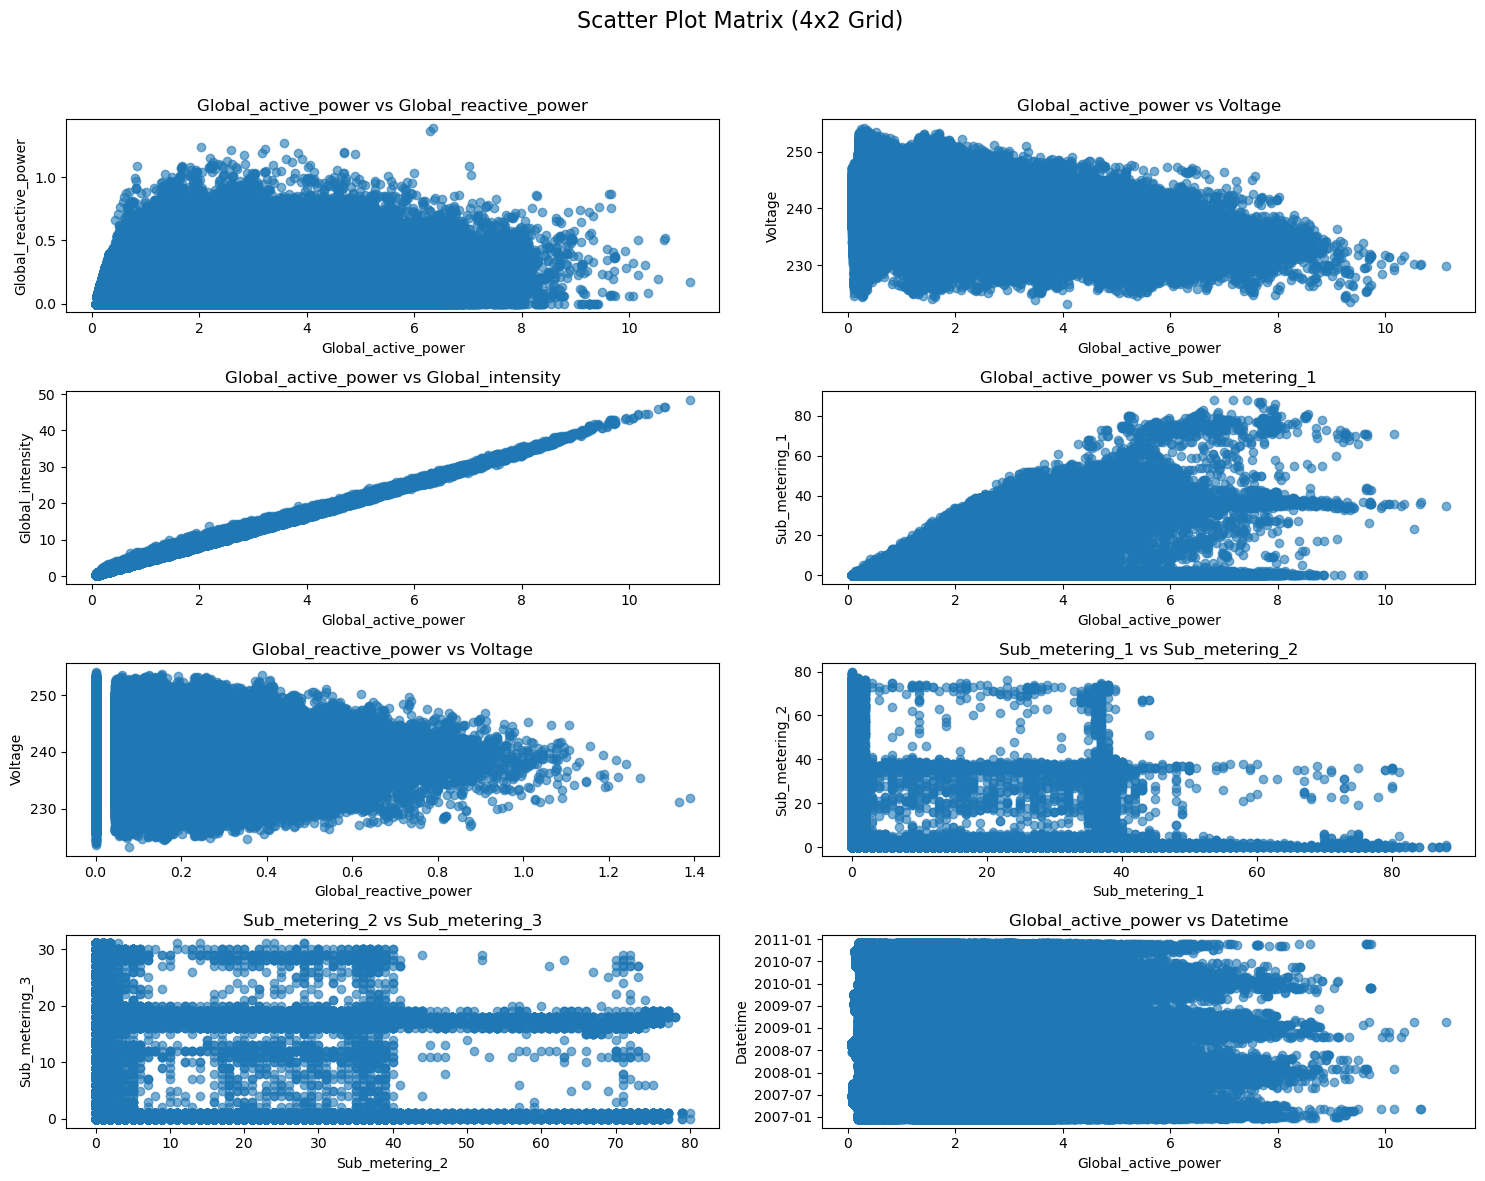

In [19]:
columns1 = ['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Voltage','Sub_metering_2','Sub_metering_3','Datetime']
columns = ['Global_active_power','Global_active_power','Global_active_power','Global_active_power','Global_reactive_power','Sub_metering_1',
           'Sub_metering_2','Global_active_power']

# Create a 3x2 grid of scatter plots
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
fig.suptitle("Scatter Plot Matrix (4x2 Grid)", fontsize=16)

# Iterate over rows and columns of the grid
for i, ax in enumerate(axes.flat):
    if i < len(columns):
        x_col = columns[i]
        y_col = columns1[i]
        
        # Scatter plot for each pair
        ax.scatter(hcp[x_col], hcp[y_col], alpha=0.6)
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"{x_col} vs {y_col}")

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


__Identifying and treating the outliers__

In [20]:
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                  'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# --- IQR Method ---
def detect_outliers_iqr(df, cols):
    outlier_indices = []
    for col in cols:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers)
    
    return set(outlier_indices)

iqr_outliers = detect_outliers_iqr(hcp, numerical_cols)
print(f"Outliers detected using IQR Method: {len(iqr_outliers)} rows")

Outliers detected using IQR Method: 314123 rows


In [21]:
# --- Z-Score Method ---
def detect_outliers_zscore(df, cols, threshold=3):
    outlier_indices = []
    for col in cols:
        mean = df[col].mean()
        std_dev = df[col].std()
        
        # Compute Z-scores
        z_scores = (df[col] - mean) / std_dev
        
        # Identify outliers
        outliers = df[np.abs(z_scores) > threshold].index
        outlier_indices.extend(outliers)
    
    return set(outlier_indices)

zscore_outliers = detect_outliers_zscore(hcp, numerical_cols)
print(f"Outliers detected using Z-Score Method: {len(zscore_outliers)} rows")

Outliers detected using Z-Score Method: 137109 rows


In [22]:
# --- Compare Outliers ---
common_outliers = iqr_outliers & zscore_outliers
print(f"Common outliers between IQR and Z-Score: {len(common_outliers)} rows")

Common outliers between IQR and Z-Score: 137109 rows


__Removing Outliers__

In [24]:
hcp_cleaned = hcp.drop(index=zscore_outliers)

print(f"Data size after removing outliers: {hcp_cleaned.shape}")
hcp = hcp_cleaned

Data size after removing outliers: (1938150, 8)


__Feature Engineering__

In [26]:
# Extract date and time features
hcp['hour'] = hcp['Datetime'].dt.hour
hcp['day_of_week'] = hcp['Datetime'].dt.dayofweek
hcp['year'] = hcp['Datetime'].dt.year

In [27]:
# Total energy consumption
hcp['total_energy'] = hcp['Sub_metering_1'] + hcp['Sub_metering_2'] + hcp['Sub_metering_3']

# Proportion of energy consumption for each sub-metering area
hcp['Sub_metering_1_ratio'] = hcp['Sub_metering_1'] / hcp['total_energy']
hcp['Sub_metering_2_ratio'] = hcp['Sub_metering_2'] / hcp['total_energy']
hcp['Sub_metering_3_ratio'] = hcp['Sub_metering_3'] / hcp['total_energy']

# Dealing with nan values
hcp['Sub_metering_1_ratio'] = hcp['Sub_metering_1'].fillna(0.0)
hcp['Sub_metering_2_ratio'] = hcp['Sub_metering_2'].fillna(0.0)
hcp['Sub_metering_3_ratio'] = hcp['Sub_metering_3'].fillna(0.0)

In [28]:
hcp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938150 entries, 14 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
 8   hour                   int32         
 9   day_of_week            int32         
 10  year                   int32         
 11  total_energy           float64       
 12  Sub_metering_1_ratio   float64       
 13  Sub_metering_2_ratio   float64       
 14  Sub_metering_3_ratio   float64       
dtypes: datetime64[ns](1), float64(11), int32(3)
memory usage: 214.4 MB


In [29]:
hcp.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,hour,day_of_week,year,total_energy,Sub_metering_1_ratio,Sub_metering_2_ratio,Sub_metering_3_ratio
14,4.054,0.422,235.24,17.6,0.0,1.0,17.0,2006-12-16 17:38:00,17,5,2006,18.0,0.0,1.0,17.0
15,3.384,0.282,237.14,14.2,0.0,0.0,17.0,2006-12-16 17:39:00,17,5,2006,17.0,0.0,0.0,17.0
16,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006-12-16 17:40:00,17,5,2006,17.0,0.0,0.0,17.0
17,3.430,0.156,237.06,14.4,0.0,0.0,17.0,2006-12-16 17:41:00,17,5,2006,17.0,0.0,0.0,17.0
18,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2006-12-16 17:42:00,17,5,2006,18.0,0.0,0.0,18.0


In [30]:
hcp.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
hour                     0
day_of_week              0
year                     0
total_energy             0
Sub_metering_1_ratio     0
Sub_metering_2_ratio     0
Sub_metering_3_ratio     0
dtype: int64

__Scalling the Features__

In [31]:
scaler = StandardScaler()
features_to_scale = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                     'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3','total_energy',
                     'Sub_metering_1_ratio','Sub_metering_2_ratio','Sub_metering_3_ratio']
hcp[features_to_scale] = scaler.fit_transform(hcp[features_to_scale]) 

In [32]:
hcp.shape

(1938150, 15)

__Splitting X and Y__

In [33]:
Y = hcp[['Global_active_power']]
X = hcp.drop({'Global_active_power','Datetime'}, axis=1)

In [34]:
X.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,year,total_energy,Sub_metering_1_ratio,Sub_metering_2_ratio,Sub_metering_3_ratio
14,3.084608,-1.931443,4.209961,-0.124351,0.547538,1.317655,17,5,2006,1.343586,-0.124351,0.547538,1.317655
15,1.676302,-1.302139,3.166341,-0.124351,-0.389908,1.317655,17,5,2006,1.225914,-0.124351,-0.389908,1.317655
16,0.368590,-1.437936,3.043563,-0.124351,-0.389908,1.317655,17,5,2006,1.225914,-0.124351,-0.389908,1.317655
17,0.408827,-1.328636,3.227731,-0.124351,-0.389908,1.317655,17,5,2006,1.225914,-0.124351,-0.389908,1.317655
18,-1.160428,-1.305452,3.043563,-0.124351,-0.389908,1.438176,17,5,2006,1.343586,-0.124351,-0.389908,1.438176


In [35]:
Y.head()

,Global_active_power
14,4.001170
15,3.146517
16,3.001098
17,3.205194
18,2.995995


In [36]:
X.shape

(1938150, 13)

In [37]:
Y.shape

(1938150, 1)

__Splitting train and test as 70-30%__

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [39]:
X_train.shape

(1356705, 13)

In [40]:
X_test.shape

(581445, 13)

__Linear Regression using sklearn__

In [41]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [42]:
ypred_test=regression_model.predict(X_test)
# Y_test['ypred']=ypred

In [43]:
# Evaluate the model
print("Metrics for Testing:")
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test, ypred_test)) 
print("Mean Squared Error (MSE):", mean_squared_error(Y_test, ypred_test)) 
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(Y_test, ypred_test))) 
print("R-squared (R2) Score:", r2_score(Y_test,ypred_test))
print("Mean Absolute Percent Error (MAPE):",mean_absolute_percentage_error(Y_test, ypred_test) * 100)

Metrics for Testing:
Mean Absolute Error (MAE): 0.029138616268714685
Mean Squared Error (MSE): 0.002013278286893516
Root Mean Squared Error (RMSE): 0.04486956972039643
R-squared (R2) Score: 0.9979814291387258
Mean Absolute Percent Error (MAPE): 10.029200141337716


In [44]:
ypred_train=regression_model.predict(X_train)

In [45]:
# Evaluate the model
print("Metrics for Training:")
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_train, ypred_train)) 
print("Mean Squared Error (MSE):", mean_squared_error(Y_train, ypred_train)) 
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(Y_train, ypred_train))) 
print("R-squared (R2) Score:", r2_score(Y_train,ypred_train))
print("Mean Absolute Percent Error (MAPE):",mean_absolute_percentage_error(Y_train, ypred_train) * 100)

Metrics for Training:
Mean Absolute Error (MAE): 0.029071335108495893
Mean Squared Error (MSE): 0.001989950215833684
Root Mean Squared Error (RMSE): 0.0446088580422508
R-squared (R2) Score: 0.9980122791890524
Mean Absolute Percent Error (MAPE): 10.154684960853652


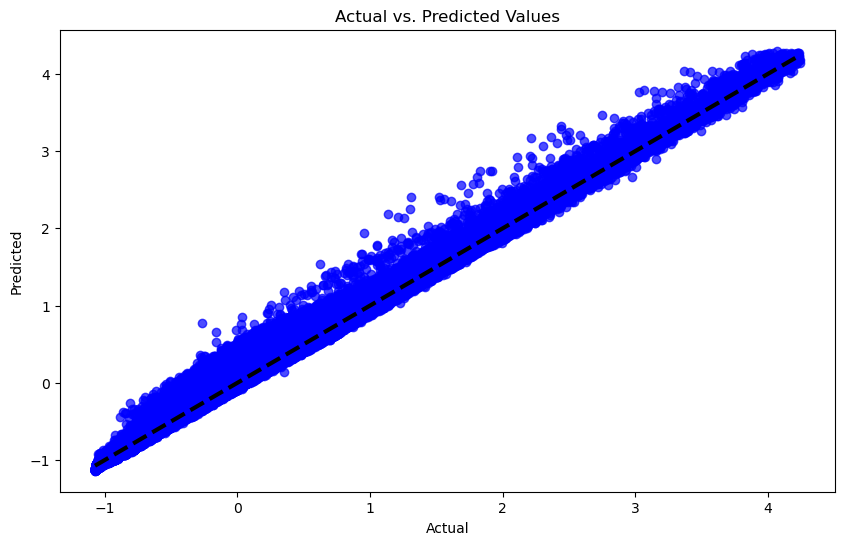

In [46]:
# Actual vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, ypred_test, alpha=0.7, color='b')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

__The concentration of points near the diagonal line with minimal spread indicates a good fit.__
The points align closely around the diagonal dashed line (the ideal line where Actual=Predicted), 
indicating a strong agreement between the model's predictions and the actual values.
This suggests that the model has performed well and captured the relationship between the predictors and the target variable effectively.
The model appears to perform consistently across the range of the actual values, as there is no noticeable bias in certain regions 
(e.g., underestimation at higher values or overestimation at lower values).
The scatter points are symmetrically distributed around the diagonal line. 
This symmetry suggests that the model's residuals (errors) may have a mean close to zero, which is desirable for a well-calibrated regression model.

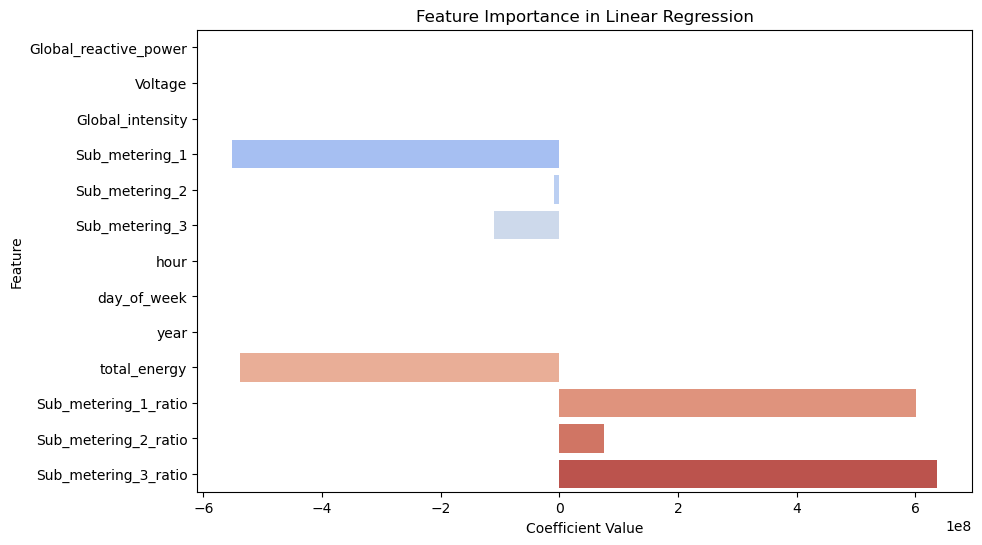

In [48]:
# Extract coefficients
coefficients = regression_model.coef_
features = X.columns

# Ensure that coefficients are 1-dimensional 
coefficients = coefficients.flatten()

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette='coolwarm', hue=features, dodge=False, legend=False)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.show()

Positive coefficients (bars extending to the right) indicate that an increase in the feature value is associated with an increase in the target variable.
__Key positive predictors: "Sub_metering_3_ratio", "Sub_metering_1_ratio", and "total_energy".__
Negative coefficients (bars extending to the left) suggest that an increase in the feature value is associated with a decrease in the target variable.
__Key negative predictors: "Sub_metering_1" and "Sub_metering_2".__

__Linear Regression using Statsmodel__

In [50]:
import statsmodels.api as sm

X = sm.add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 7.569e+07
Date:                 Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                         19:01:21   Log-Likelihood:             2.2940e+06
No. Observations:              1356705   AIC:                        -4.588e+06
Df Residuals:                  1356695   BIC:                        -4.588e+06
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Visualization of the Model Performance

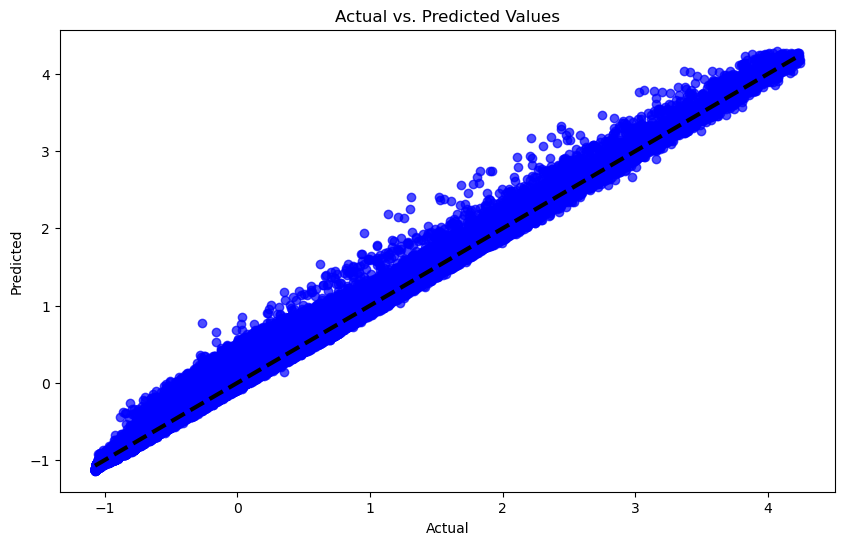

In [52]:
y_pred = model.predict(X_test)

# Actual vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.7, color='b')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

__The concentration of points near the diagonal line with minimal spread indicates a good fit.__ The points align closely around the diagonal dashed line (the ideal line where Actual=Predicted), indicating a strong agreement between the model's predictions and the actual values. This suggests that the model has performed well and captured the relationship between the predictors and the target variable effectively. The model appears to perform consistently across the range of the actual values, as there is no noticeable bias in certain regions (e.g., underestimation at higher values or overestimation at lower values). The scatter points are symmetrically distributed around the diagonal line. This symmetry suggests that the model's residuals (errors) may have a mean close to zero, which is desirable for a well-calibrated regression model.

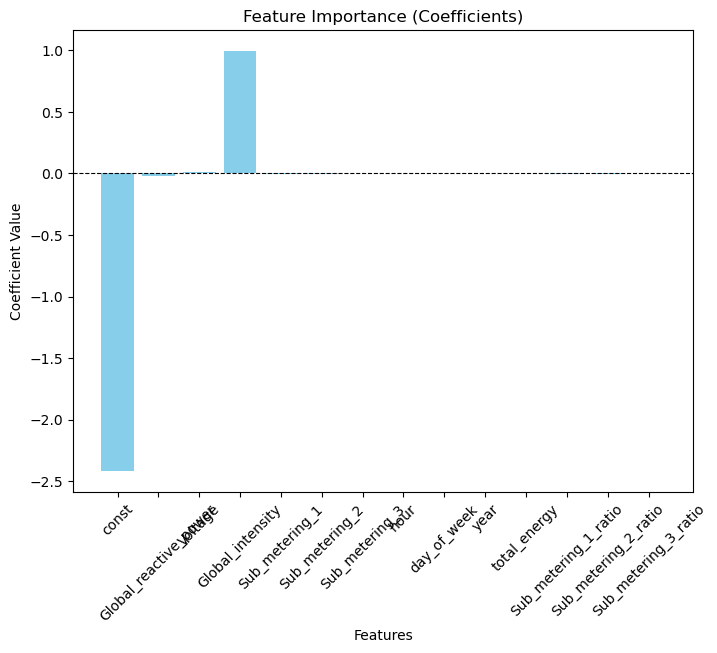

In [54]:
# Get coefficients and feature names
coef = model.params  # Coefficients
features = coef.index  # Feature names

# Plot
plt.figure(figsize=(8, 6))
plt.bar(features, coef, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.xticks(rotation=45)
plt.show()

A specific variable (e.g., "Global_intensity") has the largest positive coefficient, indicating it has the strongest positive effect on the target variable.
Other variables have smaller or negligible coefficients, which might suggest a weaker relationship with the target variable.

__Visualization__

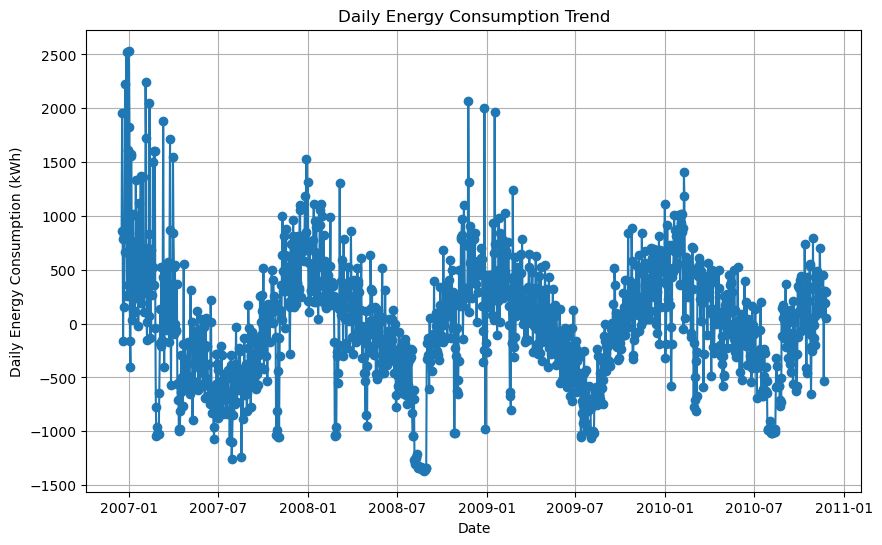

In [56]:
# Aggregate data by day
daily_consumption = hcp.groupby(hcp['Datetime'].dt.date)['Global_active_power'].sum()

# Plot daily energy consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_consumption.index, daily_consumption.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (kWh)')
plt.title('Daily Energy Consumption Trend')
plt.grid(True)
plt.show()

There seem to be recurring peaks and troughs in energy usage that align with specific times of the year.
There are significant spikes in energy consumption at certain times.
The plot shows negative values for energy consumption, which might indicate energy generation (e.g., through solar panels) or metering adjustments.
The data shows fluctuating trends over the years, with some periods of relatively stable or lower energy usage.

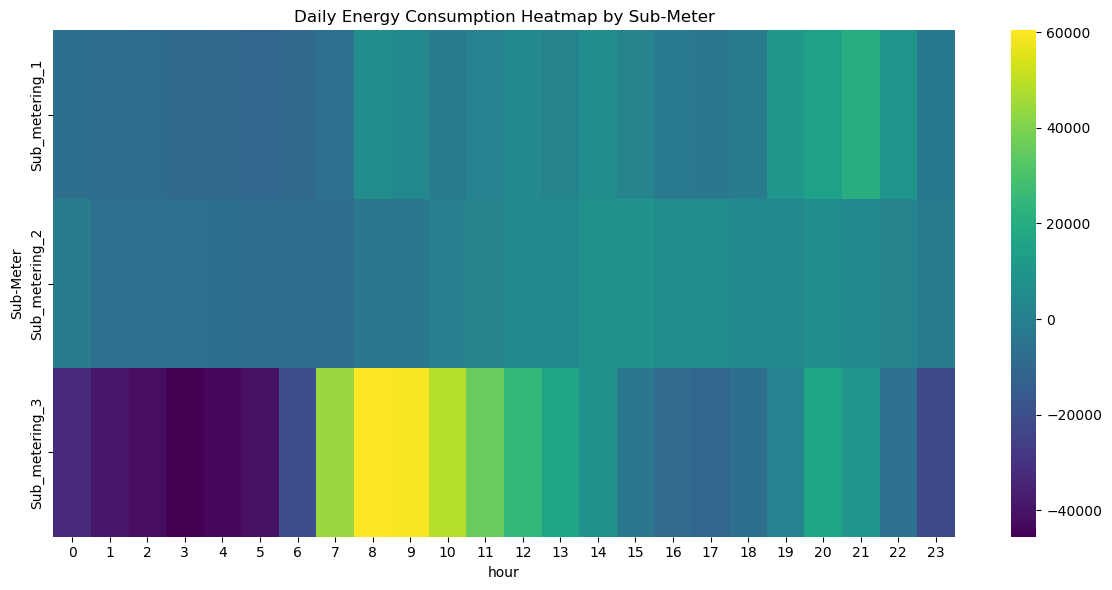

In [58]:
# Aggregate by day and sum sub-metering columns
hcp_daily = hcp.groupby(hcp['Datetime'].dt.hour)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Transpose for heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(hcp_daily.T, cmap='viridis', annot=False, cbar=True)

# Add title and labels
plt.title('Daily Energy Consumption Heatmap by Sub-Meter')
plt.xlabel('hour')
plt.ylabel('Sub-Meter')
plt.tight_layout()
plt.show()



High energy usage is observed during the morning hours (6 AM - 9 AM)
Moderate usage is also noticeable during evening hours (6 PM - 9 PM)
The heatmap shows some negative energy values, which may indicate:
Errors in the dataset or measurement.
Calibration issues in the metering devices. These should be investigated to ensure accurate energy tracking.

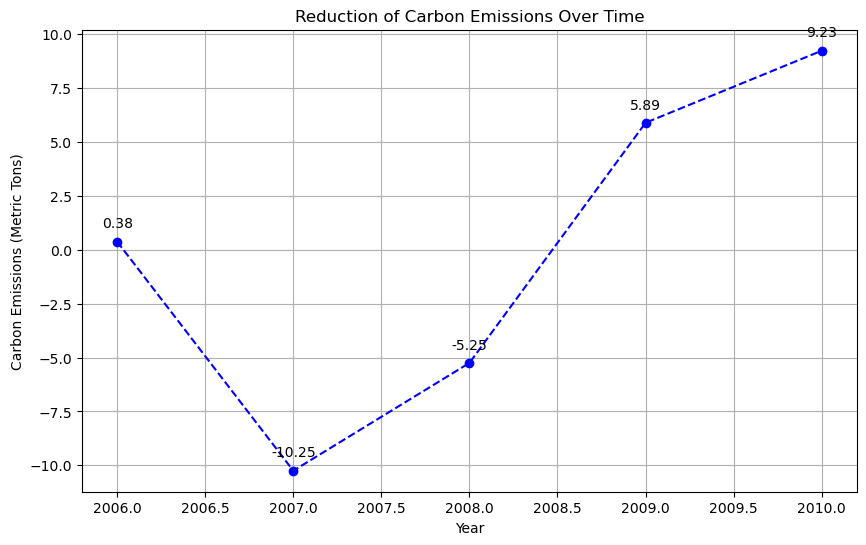

In [107]:
df = hcp
# Estimate carbon emissions (assuming 0.233 kg of CO2 per kWh as an example conversion factor)
df['carbon_emissions'] = df['total_energy'] * 0.233

# Aggregate carbon emissions by year
annual_emissions = df.groupby('year')['carbon_emissions'].sum().reset_index()

# Convert carbon emissions to metric tons
annual_emissions['carbon_emissions'] = annual_emissions['carbon_emissions'] / 1000

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(annual_emissions['year'], annual_emissions['carbon_emissions'], marker='o', color='b', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Metric Tons)')
plt.title('Reduction of Carbon Emissions Over Time')
plt.grid(True)

# Annotate points with carbon savings
for i, txt in enumerate(annual_emissions['carbon_emissions']):
    plt.annotate(f'{txt:.2f}', (annual_emissions['year'][i], annual_emissions['carbon_emissions'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

The plot highlights significant variations in carbon emissions across years, with notable reductions and increases. For example, emissions dropped drastically between 2006 and 2007 but rebounded after 2008. These fluctuations indicate changes in energy consumption patterns, possibly due to seasonality, energy-saving measures, or changes in household behavior.